# Data Visualisation et Feature Selection et Normalisation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## 1.	L’exploration des données du Data set en utilisant pandas.

In [2]:
url = r"C:\Users\dell\Desktop\LSi S4\machine_learning\pima-indians-diabetes.csv"
name = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names =name)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2. Le résumer statistique du Data Set 

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.	L'affichage des nuages des points 

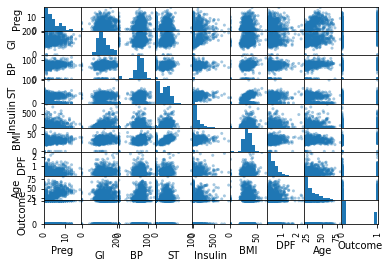

In [4]:
Features  = ['Preg','Gl', 'BP', 'ST', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(url, names =Features )
scatter_matrix(df,alpha=0.4)
plt.show()

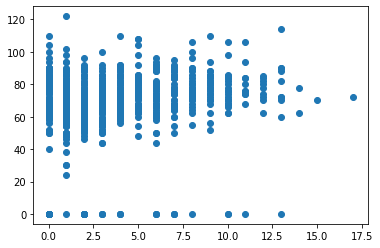

In [5]:
plt.scatter(df.Preg,df.BP)


## 4. les 4 méthodes de Features selection

### 4.1 Univariate Selection

In [6]:
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
array = df.values
X = array[:,0:7]
Y = array[:,8]

Univariate Selection: Statistical tests that can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

score_func utilise par defaut la fonction: f_classif

chi2: Chi-squared stats of non-negative features for classification tasks.


In [8]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)


You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores)

In [9]:
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# the 4 features are : 0,1,4,5

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393]


In [10]:
# summarize selected features
features[0:8,:]

array([[  6. , 148. ,   0. ,  33.6],
       [  1. ,  85. ,   0. ,  26.6],
       [  8. , 183. ,   0. ,  23.3],
       [  1. ,  89. ,  94. ,  28.1],
       [  0. , 137. , 168. ,  43.1],
       [  5. , 116. ,   0. ,  25.6],
       [  3. ,  78. ,  88. ,  31. ],
       [ 10. , 115. ,   0. ,  35.3]])

# SVM

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [13]:
from sklearn.svm import SVC # "Support vector classifier" 
classifier = SVC(kernel='linear', random_state=0) 
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
#Predicting the test set result 
y_pred= classifier.predict(x_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix 
cm= confusion_matrix(y_test, y_pred)

In [15]:
print(cm)

[[141  16]
 [ 35  39]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       157
         1.0       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

